In [1]:
import pandas as pd
import numpy as np
import psycopg2
from datetime import datetime, timedelta
from sqlalchemy import create_engine
from urllib.parse import quote_plus

In [19]:
# # --- FUNCTION TO GET CLASSIFICATION AND RANGE ---
# def get_date_diff_classification(last_run_date, current_date):
#     # Parse strings into datetime
#     last_run_date = datetime.strptime(last_run_date, '%Y-%m-%d')
#     current_date = datetime.strptime(current_date, '%Y-%m-%d')

#     year_diff = current_date.year - last_run_date.year
#     month_diff = (year_diff * 12) + (current_date.month - last_run_date.month)

#     if year_diff >= 1:
#         flag = 'YLY'
#         # Two full years: from Jan 1st of (current_year - 2) to Jan 1st of current year
#         start_date = datetime(current_date.year - 2, 1, 1)
#         end_date = datetime(current_date.year, 1, 1)
#     elif month_diff >= 1:
#         flag = 'MLY'
#         # Two full months: get start of month before last and start of current month
#         this_month_start = current_date.replace(day=1)
#         last_month_start = (this_month_start - timedelta(days=1)).replace(day=1)
#         month_before_last_start = (last_month_start - timedelta(days=1)).replace(day=1)

#         start_date = month_before_last_start
#         end_date = this_month_start
#     else:
#         raise ValueError("Insufficient time difference between last and current run.")

#     return flag, start_date, end_date

In [10]:
# def get_date_diff_classification(current_date):
#     # Parse strings into datetime
#     current_date = datetime.strptime(current_date, '%Y-%m-%d')
#     if current_date.month == 1:
#         # Full two years prior
#         flag = 'YLY'
#         start_date = datetime(current_date.year - 3, 1, 1)
#         end_date = datetime(current_date.year, 1, 1)
#     else:
#         # From start of current year to start of next month
#         flag = 'MLY'
#         start_date = datetime(current_date.year, 1, 1)
#         # Compute first day of next month
#         if current_date.month == 12:
#             end_date = datetime(current_date.year + 1, 1, 1)
#         else:
#             end_date = datetime(current_date.year, current_date.month + 1, 1)
#     return flag, start_date, end_date

In [11]:
# # --- MAIN EXECUTION ---
# current_date = datetime.today().strftime('%Y-%m-%d') 
# flag, start_date, end_date = get_date_diff_classification(current_date)
# print(f"Classification: {flag}")
# print(f"Query Start: {start_date}")
# print(f"Query End: {end_date}")

# query = """
# SELECT ac_month_date, agent_name, lob, reporting_line, nep, nic, noc, nop_t 
# FROM ads.fct_all_lob_ag_acy_mly 
# WHERE ac_month_date >= %s AND ac_month_date < %s
# """
# query_params = [start_date, end_date]
# # --- DB CONNECTION ---
# try:
#     connection = psycopg2.connect(
#         host = "172.16.10.212",
#         dbname = "PIB_PRD",
#         user = "usr_app_pdi",
#         password = 'Usr@ppPd!#123',
#         port = "5432"
#     )
#     print("Connected to the database")

#     cursor = connection.cursor()
#     dff = pd.read_sql_query(query, connection, params=query_params)
#     print("DataFrame Fetched Successfully!")
#     print(dff.head())

# except Exception as e:
#     print("Error: Unable to connect to the database")
#     print(e)

Classification: MLY
Query Start: 2025-01-01 00:00:00
Query End: 2025-07-01 00:00:00
Connected to the database


C:\Users\ananya.datta\AppData\Local\Temp\ipykernel_7384\784725216.py:26: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dff = pd.read_sql_query(query, connection, params=query_params)


DataFrame Fetched Successfully!
  ac_month_date                                  agent_name  lob  \
0    2025-06-01  GENERALI INSURANCE MALAYSIA BHD (MPI)(CAB)  ENG   
1    2025-06-01          MSIG INSURANCE (MALAYSIA) BHD(CAB)  PAC   
2    2025-06-01  Zurich General Insurance Malaysia Bhd (JB)  FIR   
3    2025-06-01          MSIG INSURANCE (MALAYSIA) BHD(CAB)  FIR   
4    2025-06-01      TOKIO MARINE INSURANS (M) BERHAD (CAB)  ENG   

  reporting_line  nep  nic  noc  nop_t  
0      KL Agency  0.0  0.0  0.0    0.0  
1       Branches  0.0  0.0  0.0    0.0  
2       Branches  0.0  0.0  0.0    0.0  
3       Branches  0.0  0.0  0.0    0.0  
4       Branches  0.0  0.0  0.0    0.0  


In [20]:
# # --- MAIN EXECUTION ---
# last_run_date = "2025-06-05"
# current_date = datetime.today().strftime('%Y-%m-%d') 

# flag, start_date, end_date = get_date_diff_classification(last_run_date, current_date)

# print(f"Classification: {flag}")
# print(f"Query Start: {start_date}")
# print(f"Query End: {end_date}")

# query = """
# SELECT ac_month_date, agent_name, lob, reporting_line, nep, nic, noc, nop_t 
# FROM ads.fct_all_lob_ag_acy_mly 
# WHERE ac_month_date >= %s AND ac_month_date < %s
# """

# query_params = [start_date, end_date]

# # --- DB CONNECTION ---
# try:
#     connection = psycopg2.connect(
#         host = "172.16.10.212",
#         dbname = "PIB_PRD",
#         user = "usr_app_pdi",
#         password = 'Usr@ppPd!#123',
#         port = "5432"
#     )
#     print("Connected to the database")

#     cursor = connection.cursor()
#     dff = pd.read_sql_query(query, connection, params=query_params)
#     print("DataFrame Fetched Successfully!")
#     print(dff.head())

# except Exception as e:
#     print("Error: Unable to connect to the database")
#     print(e)

Classification: YLY
Query Start: 2023-01-01 00:00:00
Query End: 2025-01-01 00:00:00
Connected to the database


C:\Users\ananya.datta\AppData\Local\Temp\ipykernel_11768\1266187988.py:32: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dff = pd.read_sql_query(query, connection, params=query_params)


DataFrame Fetched Successfully!
  ac_month_date                           agent_name  lob reporting_line  nep  \
0    2023-06-01  MALAYAN BANKING BHD (BANDAR SUNWAY)  MTA   POS/Affinity  0.0   
1    2023-06-01  MALAYAN BANKING BHD (BANDAR SUNWAY)  MTA   POS/Affinity  0.0   
2    2023-06-01  MALAYAN BANKING BHD (BANDAR SUNWAY)  MTA   POS/Affinity  0.0   
3    2023-06-01  MALAYAN BANKING BHD (BANDAR SUNWAY)  MTA   POS/Affinity  0.0   
4    2023-06-01  MALAYAN BANKING BHD (BANDAR SUNWAY)  MTA   POS/Affinity  0.0   

   nic  noc  nop_t  
0  0.0  0.0    0.0  
1  0.0  0.0    0.0  
2  0.0  0.0    0.0  
3  0.0  0.0    0.0  
4  0.0  0.0    0.0  


In [4]:
# --- MAIN EXECUTION ---
query = """
SELECT ac_month_date, agent_name, lob, reporting_line, nep, nic, noc, nop_t 
FROM ads.fct_all_lob_ag_acy_mly 
WHERE ac_month_date >= '2020-01-01'
"""
# --- DB CONNECTION ---
try:
    connection = psycopg2.connect(
        host = "172.16.10.212",
        dbname = "PIB_PRD",
        user = "usr_app_pdi",
        password = 'Usr@ppPd!#123',
        port = "5432"
    )
    print("Connected to the database")

    cursor = connection.cursor()
    dff = pd.read_sql_query(query, connection)
    print("DataFrame Fetched Successfully!")
    print(dff.head())

except Exception as e:
    print("Error: Unable to connect to the database")
    print(e)

Connected to the database


C:\Users\ananya.datta\AppData\Local\Temp\ipykernel_14848\982913816.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dff = pd.read_sql_query(query, connection)


DataFrame Fetched Successfully!
  ac_month_date                    agent_name  lob     reporting_line  nep  \
0    2022-06-01  M ADVISORY SOLUTIONS SDN BHD  MDG  Alternate Channel  0.0   
1    2022-06-01  M ADVISORY SOLUTIONS SDN BHD  MDG  Alternate Channel  0.0   
2    2022-06-01  M ADVISORY SOLUTIONS SDN BHD  MDG  Alternate Channel  0.0   
3    2022-06-01  M ADVISORY SOLUTIONS SDN BHD  MDG  Alternate Channel  0.0   
4    2022-06-01     Firmus Financial Sdn. Bhd  MDI           Branches  0.0   

   nic  noc  nop_t  
0  0.0  0.0    0.0  
1  0.0  0.0    0.0  
2  0.0  0.0    0.0  
3  0.0  0.0    0.0  
4  0.0  0.0    0.0  


In [4]:
dff.to_csv('AGENTVIEW_DATA.csv',index=False)

In [2]:
dff = pd.read_csv(r'C:\Users\ananya.datta\OneDrive - Fairfax Asia Ltd\Desktop\Project 2 - Agent Scorecard\AGENTVIEW_DATA.csv')
dff.shape

(3515333, 8)

In [3]:
dff.ac_month_date.value_counts()

ac_month_date
2023-01-01    131568
2023-04-01    130094
2023-07-01    124366
2023-10-01    116088
2024-01-01    114121
2023-05-01    111807
2023-02-01    109478
2025-01-01    108534
2023-08-01    108492
2024-07-01    106084
2023-03-01    105561
2024-10-01    105360
2025-04-01    103800
2024-04-01    103320
2023-06-01    101869
2023-12-01     99170
2023-11-01     97889
2024-03-01     97184
2024-12-01     96933
2023-09-01     94874
2024-06-01     94873
2024-05-01     93086
2025-05-01     92969
2024-02-01     91630
2024-08-01     91141
2024-09-01     88938
2025-02-01     87791
2024-11-01     87060
2025-03-01     78880
2022-12-01     48024
2022-06-01     45996
2022-09-01     44952
2022-07-01     44867
2022-08-01     44553
2022-10-01     44479
2022-05-01     44378
2022-11-01     44172
2022-03-01     44091
2022-02-01     43657
2022-04-01     43317
2022-01-01     41897
2025-06-01      7990
Name: count, dtype: int64

In [4]:
dff.columns

Index(['ac_month_date', 'agent_name', 'lob', 'reporting_line', 'nep', 'nic',
       'noc', 'nop_t'],
      dtype='object')

In [15]:
df = dff.copy()
print(df.shape)
# Grouping data records on the basis of policyno, inceptiondate, expirydate, split
df = df.groupby(['ac_month_date','agent_name','lob','reporting_line'], as_index = False).agg({
    'nep':'sum','nic':'sum','nop_t':'sum','noc':'sum'
},axis=1)
df.shape

(3515333, 8)


(603688, 8)

In [16]:
df['ac_month_date'] = pd.to_datetime(df['ac_month_date'])

# Filter out invalid rows
df = df[~((df['nep'] == 0))]
df = df[~((df['nop_t'] == 0))]
df = df[df['nic'] >= 0]
df['lob'] = df['lob'].replace({'AVI': 'HUL', 'UNK': 'HUL', 'ZNA': 'HUL'})
df = df.dropna(subset=['agent_name', 'nep'])

# Extract year and month
df['account_yr'] = df['ac_month_date'].dt.year
df['month'] = df['ac_month_date'].dt.month

# Assign all rows as Monthly for now
df['flag'] = 'MLY'

In [17]:
df.shape

(170623, 11)

In [18]:
df.head()

,ac_month_date,agent_name,lob,reporting_line,nep,nic,nop_t,noc,account_yr,month,flag
1,2022-01-01,A K SEER AGENCY,FIR,Branches,262.029560,0.00,2.0,0.0,2022,1,MLY
10,2022-01-01,A NAGENDRAN AGENCY,MOT,Branches,4515.096071,0.00,7.0,0.0,2022,1,MLY
14,2022-01-01,A Plus Network,LIA,Branches,45.323544,0.00,3.0,0.0,2022,1,MLY
16,2022-01-01,A Plus Network,MED,Branches,804.460714,0.00,1.0,0.0,2022,1,MLY
17,2022-01-01,A Plus Network,MOT,Branches,4050.722996,4424.55,12.0,1.0,2022,1,MLY


In [19]:
def divide(x, y):
    if y == 0:
        return float('nan') 
    return x / y

def minus(x,y):
    return x-y

In [20]:
d = pd.DataFrame()
print(d)

Empty DataFrame
Columns: []
Index: []


In [21]:
def process_data(df):
    df['ac_month_date'] = pd.to_datetime(df['ac_month_date'])

    df_MLY = df[df['flag'] == 'MLY'].copy()

    finaldfM = pd.DataFrame()
    finaldfY = pd.DataFrame()

    # Thresholds for each line of business
    lob_thresholds = {
        'PAC': 0.50, 'FIR': 0.50, 'LIA': 0.50, 'ENG': 0.60, 'WRK': 0.20,
        'ACC': 0.45, 'MAR': 0.35, 'MED': 0.65, 'BON': 0.10, 'HUL': 0.65, 'MOT': 0.75
    }

    # Weights
    WEIGHT_PROFITABILITY = 0.40
    WEIGHT_CLAIMS = 0.30
    WEIGHT_GWP_GROWTH = 0.30

    def normalize_columns(col):
        min_val, max_val = col.min(), col.max()
        return (col - min_val) / (max_val - min_val) if min_val != max_val else pd.Series([np.nan]*len(col), index=col.index)

    def calculate_profitability(data):
        def assign_lob_score(row):
            threshold = lob_thresholds.get(row['lob'], 0.75)
            return threshold - row['loss_ratio']
        data['lob_score'] = data.apply(assign_lob_score, axis=1)
        data['Nlob_score'] = normalize_columns(data['lob_score'])
        return data

    def classify_agents(df, score_col='final_score', ratio_col='nic/nep ratio', score_pct=0.75, ratio_pct=0.70):
        df[ratio_col] = df[ratio_col].clip(lower=0)
        score_thresh = df[score_col].quantile(score_pct)
        ratio_thresh = df[ratio_col].quantile(ratio_pct)
        df['score_level'] = np.where(df[score_col] > score_thresh, 'High', 'Low')
        df['ratio_level'] = np.where(df[ratio_col] > ratio_thresh, 'High', 'Low')

        def assign_class(row):
            if row['score_level'] == 'High' and row['ratio_level'] == 'Low':
                return 'Efficient Performer'
            elif row['score_level'] == 'High' and row['ratio_level'] == 'High':
                return 'Costly Performer'
            elif row['score_level'] == 'Low' and row['ratio_level'] == 'High':
                return 'High-Risk Underperformer'
            else:
                return 'Low-Impact Agent'

        df['agent_class'] = df.apply(assign_class, axis=1)
        return df

    def process_reporting_line_df(df, group_field):
        df = df.sort_values(by=['agent_name', group_field]).reset_index(drop=True)
        df['nic/nep ratio'] = df['nic'] / df['nep']
        return df

    ### ---------- MLY ----------
    if not df_MLY.empty:
        M = df_MLY.groupby(['ac_month_date', 'agent_name', 'lob', 'reporting_line']).agg({
            'nep': 'sum', 'nic': 'sum', 'noc': 'sum', 'nop_t': 'sum',
            'account_yr': 'first'
        }).reset_index()

        M['frequency'] = M.apply(lambda row: row['noc'] / row['nop_t'] if row['nop_t'] else 0, axis=1)
        M['severity'] = M.apply(lambda row: row['nic'] / row['noc'] if row['noc'] else 0, axis=1)
        M['loss_ratio'] = M.apply(lambda row: row['nic'] / row['nep'] if row['nep'] else 0, axis=1)

        M = calculate_profitability(M)
        M['claims_score'] = M['frequency'] + M['severity']
        M['Nclaims_score'] = normalize_columns(M['claims_score'])

        M['prev_month'] = M.groupby(['agent_name', 'lob'])['ac_month_date'].shift(1)
        M['prev_nep'] = M.groupby(['agent_name', 'lob'])['nep'].shift(1)
        M['nep_growth'] = ((M['nep'] - M['prev_nep']) / M['prev_nep'].replace(0, np.nan)).fillna(0)
        M['Nnep_growth'] = normalize_columns(M['nep_growth'])

        M['final_score'] = (
            WEIGHT_PROFITABILITY * M['Nlob_score'] +
            WEIGHT_CLAIMS * M['Nclaims_score'] +
            WEIGHT_GWP_GROWTH * M['Nnep_growth']
        )

        M1 = M.groupby(['ac_month_date', 'agent_name', 'reporting_line']).agg({
            'lob': lambda x: ', '.join(sorted(set(x))),
            'nep': 'sum', 'nic': 'sum', 'noc': 'sum', 'nop_t': 'sum', 'final_score': 'sum'
        }).reset_index()
        M1 = M1[M1.agent_name != 'THE PACIFIC INSURANCE BERHAD (KL)']
        M1['nic/nep ratio'] = M1['nic'] / M1['nep']

        M1 = process_reporting_line_df(M1, 'ac_month_date')
        M1 = M1.groupby('ac_month_date').apply(classify_agents).reset_index(drop=True)
        M1['date_type'] = 'MLY'

        finaldfM = M1

    ### ---------- YLY ----------
    years_with_december = df_MLY[df_MLY['month'] == 12]['ac_month_date'].dt.year.unique()
    df_YLY_list = []

    for year in years_with_december:
        year_data = finaldfM[finaldfM['ac_month_date'].dt.year == year].copy()
        if year_data.empty:
            continue

        N = year_data.groupby(['agent_name', 'lob', 'reporting_line']).agg({
            'nep': 'sum', 'nic': 'sum', 'noc': 'sum', 'nop_t': 'sum'
        }).reset_index()
        N['account_yr'] = year

        N['frequency'] = N.apply(lambda row: row['noc'] / row['nop_t'] if row['nop_t'] else 0, axis=1)
        N['severity'] = N.apply(lambda row: row['nic'] / row['noc'] if row['noc'] else 0, axis=1)
        N['loss_ratio'] = N.apply(lambda row: row['nic'] / row['nep'] if row['nep'] else 0, axis=1)

        N = calculate_profitability(N)
        N['claims_score'] = N['frequency'] + N['severity']
        N['Nclaims_score'] = normalize_columns(N['claims_score'])

        prev_year_data = finaldfM[finaldfM['ac_month_date'].dt.year == (year - 1)]
        prev_nep = prev_year_data.groupby(['agent_name', 'lob'])['nep'].sum().reset_index()
        prev_nep = prev_nep.rename(columns={'nep': 'prev_nep'})

        N = pd.merge(N, prev_nep, on=['agent_name', 'lob'], how='left')
        N['nep_growth'] = ((N['nep'] - N['prev_nep']) / N['prev_nep'].replace(0, np.nan)).fillna(0)
        N['Nnep_growth'] = normalize_columns(N['nep_growth'])

        N['final_score'] = (
            WEIGHT_PROFITABILITY * N['Nlob_score'] +
            WEIGHT_CLAIMS * N['Nclaims_score'] +
            WEIGHT_GWP_GROWTH * N['Nnep_growth']
        )

        N1 = N.groupby(['agent_name', 'reporting_line']).agg({
            'lob': lambda x: ', '.join(sorted(set(x))),
            'nep': 'sum', 'nic': 'sum', 'noc': 'sum', 'nop_t': 'sum', 'final_score': 'sum'
        }).reset_index()
        N1['nic/nep ratio'] = N1['nic'] / N1['nep']
        N1['account_yr'] = year

        N1 = process_reporting_line_df(N1, 'account_yr')
        N1 = N1.groupby('account_yr').apply(classify_agents).reset_index(drop=True)

        # Assign artificial year-end date
        N1['ac_month_date'] = pd.to_datetime(f"{year}-12-31")
        N1['date_type'] = 'YLY'

        df_YLY_list.append(N1)

    finaldfY = pd.concat(df_YLY_list, ignore_index=True) if df_YLY_list else pd.DataFrame()

    # Combine and return
    data = pd.concat([finaldfM, finaldfY], ignore_index = True)
    return data

In [22]:
# def process_data(df):
#     df['ac_month_date'] = pd.to_datetime(df['ac_month_date'])
    
#     df_MLY = df[df['flag'] == 'MLY'].copy()
#     df_YLY = df[df['flag'] == 'YLY'].copy()

#     finaldfM = pd.DataFrame()
#     finaldfY = pd.DataFrame()
#     # Thresholds for each line of business (lob)
#     lob_thresholds = {
#         'PAC': 0.50,
#         'FIR': 0.50,
#         'LIA': 0.50,
#         'ENG': 0.60,
#         'WRK': 0.20,
#         'ACC': 0.45,
#         'MAR': 0.35,
#         'MED': 0.65,
#         'BON': 0.10,
#         'HUL': 0.65,
#         'MOT': 0.75
#     }
    
#     # Weights
#     WEIGHT_PROFITABILITY = 0.40
#     WEIGHT_CLAIMS = 0.30
#     WEIGHT_GWP_GROWTH = 0.30
#     def normalize_columns(col):
#         min_val, max_val = col.min(), col.max()
#         return (col - min_val) / (max_val - min_val) if min_val != max_val else pd.Series([np.nan]*len(col), index=col.index)

#     def calculate_profitability(data):
#         def assign_lob_score(row):
#             threshold = lob_thresholds.get(row['lob'], 0.75)
#             return threshold - row['loss_ratio']
#         data['lob_score'] = data.apply(assign_lob_score, axis=1)
#         data['Nlob_score'] = normalize_columns(data['lob_score'])
#         return data

#     def classify_agents(df, score_col='final_score', ratio_col='nic/nep ratio', score_pct=0.75, ratio_pct=0.70):
#         if len(df) < 2:
#             df['score_level'] = np.nan
#             df['ratio_level'] = np.nan
#             df['agent_class'] = np.nan
#             return df
    
#         df[ratio_col] = df[ratio_col].clip(lower=0)
#         score_thresh = df[score_col].quantile(score_pct)
#         ratio_thresh = df[ratio_col].quantile(ratio_pct)
    
#         df['score_level'] = np.where(df[score_col] > score_thresh, 'High', 'Low')
#         df['ratio_level'] = np.where(df[ratio_col] > ratio_thresh, 'High', 'Low')
    
#         def assign_class(row):
#             if row['score_level'] == 'High' and row['ratio_level'] == 'Low':
#                 return 'Efficient Performer'
#             elif row['score_level'] == 'High' and row['ratio_level'] == 'High':
#                 return 'Costly Performer'
#             elif row['score_level'] == 'Low' and row['ratio_level'] == 'High':
#                 return 'High-Risk Underperformer'
#             else:
#                 return 'Low-Impact Agent'
    
#         df['agent_class'] = df.apply(assign_class, axis=1)
#         return df

#     def process_reporting_line_df_monthly(df):
#         df = df.sort_values(by=['agent_name', 'ac_month_date'], ascending=[True, True]).reset_index(drop=True)
#         df['nic/nep ratio'] = df['nic']/df['nep']
#         return df

#     def process_reporting_line_df_yearly(df):
#         df = df.sort_values(by=['agent_name', 'account_yr'], ascending=[True, True]).reset_index(drop=True)
#         df['nic/nep ratio'] = df['nic']/df['nep']
#         return df

#     def apply_classification_to_all_dfs_monthly(reporting_line_dfs_M):
#         for name, df_subset in reporting_line_dfs_M.items():
#             reporting_line_dfs_M[name] = df_subset.groupby('ac_month_date').apply(classify_agents).reset_index(drop=True)
#             reporting_line_dfs_M[name] = reporting_line_dfs_M[name].sort_values(by=['agent_name', 'ac_month_date']).reset_index(drop=True)
#             print(f"{name} DataFrame shape after classification: {reporting_line_dfs_M[name].shape}")
#         return reporting_line_dfs_M

#     def apply_classification_to_all_dfs_yearly(reporting_line_dfs_Y):
#         for name, df_subset in reporting_line_dfs_Y.items():
#             reporting_line_dfs_Y[name] = df_subset.groupby('account_yr').apply(classify_agents).reset_index(drop=True)
#             reporting_line_dfs_Y[name] = reporting_line_dfs_Y[name].sort_values(by=['agent_name', 'account_yr']).reset_index(drop=True)
#             print(f"{name} DataFrame shape after classification: {reporting_line_dfs_Y[name].shape}")
#         return reporting_line_dfs_Y

    
#     if not df_MLY.empty:
#         M = df_MLY.groupby(['ac_month_date', 'agent_name', 'lob', 'reporting_line']).agg({
#             'nep': 'sum',
#             'nic': 'sum',
#             'noc': 'sum',
#             'nop_t': 'sum',
#             'account_yr': 'first'}).reset_index()

#         M['frequency'] = M.apply(lambda row: divide(row['noc'], row['nop_t']), axis=1)
#         M['severity'] = M.apply(lambda row: divide(row['nic'], row['noc']), axis=1)
#         M['loss_ratio'] = M.apply(lambda row: divide(row['nic'], row['nep']), axis=1)

#         M = calculate_profitability(M)
#         M['claims_score'] = M['frequency'] + M['severity']
#         M['Nclaims_score'] = normalize_columns(M['claims_score'])

#         M['prev_month'] = M.groupby(['agent_name', 'lob'])['ac_month_date'].shift(1)
#         M['prev_nep'] = M.groupby(['agent_name', 'lob'])['nep'].shift(1)
#         M['nep_growth'] = ((M['nep'] - M['prev_nep']) / M['prev_nep'].replace(0, np.nan)).fillna(0)
#         M['Nnep_growth'] = normalize_columns(M['nep_growth'])
#         M['final_score'] = (
#             WEIGHT_PROFITABILITY * M['Nlob_score'] +
#             WEIGHT_CLAIMS * M['Nclaims_score'] +
#             WEIGHT_GWP_GROWTH * M['Nnep_growth']
#         )
#         M1 = M.groupby(['ac_month_date', 'agent_name', 'reporting_line']).agg({
#             'lob': lambda x: ', '.join(sorted(set(x))),
#             'nep': 'sum',
#             'nic': 'sum',
#             'noc': 'sum',
#             'nop_t': 'sum',
#             'final_score': 'sum'
#         }).reset_index()
#         M1 = M1[M1.agent_name != 'THE PACIFIC INSURANCE BERHAD (KL)']

#         reporting_line_dfs_M = {
#             line: M1[M1['reporting_line'] == line].copy()
#             for line in M1['reporting_line'].unique()
#         }
#         for name, df_subset in reporting_line_dfs_M.items():
#             reporting_line_dfs_M[name] = process_reporting_line_df_monthly(df_subset)

#         reporting_line_dfs_M = apply_classification_to_all_dfs_monthly(reporting_line_dfs_M)

#         # Assign named variables
#         branches_df = reporting_line_dfs_M.get('Branches', pd.DataFrame())
#         pos_affinity_df = reporting_line_dfs_M.get('POS/Affinity', pd.DataFrame())
#         kl_agency_df = reporting_line_dfs_M.get('KL Agency', pd.DataFrame())
#         pamp_affinity_df = reporting_line_dfs_M.get('PAMB Affinity', pd.DataFrame())
#         alt_channel_df = reporting_line_dfs_M.get('Alternative Channel', pd.DataFrame())
#         reinsurance_df = reporting_line_dfs_M.get('Reinsurance', pd.DataFrame())
#         dbcc_df = reporting_line_dfs_M.get('DBCC', pd.DataFrame())

#         finaldfM = pd.concat(reporting_line_dfs_M.values(), ignore_index=True)
#         finaldfM['date_type'] = 'MLY'
    
#     if not df_YLY.empty:
#         N = df_YLY.groupby(['account_yr', 'agent_name', 'lob', 'reporting_line']).agg({
#             'nep': 'sum',
#             'nic': 'sum',
#             'noc': 'sum',
#             'nop_t': 'sum'}).reset_index()

#         N['frequency'] = N.apply(lambda row: divide(row['noc'], row['nop_t']), axis=1)
#         N['severity'] = N.apply(lambda row: divide(row['nic'], row['noc']), axis=1)
#         N['loss_ratio'] = N.apply(lambda row: divide(row['nic'], row['nep']), axis=1)

#         N = calculate_profitability(N)
#         N['claims_score'] = N['frequency'] + N['severity']
#         N['Nclaims_score'] = normalize_columns(N['claims_score'])

#         N['prev_nep'] = N.groupby(['agent_name', 'lob'])['nep'].shift(1)
#         N['nep_growth'] = ((N['nep'] - N['prev_nep']) / N['prev_nep'].replace(0, np.nan)).fillna(0)
#         N['Nnep_growth'] = normalize_columns(N['nep_growth'])

#         N['final_score'] = (
#             WEIGHT_PROFITABILITY * N['Nlob_score'] +
#             WEIGHT_CLAIMS * N['Nclaims_score'] +
#             WEIGHT_GWP_GROWTH * N['Nnep_growth']
#         )
#         N1 = N.groupby(['account_yr', 'agent_name', 'reporting_line']).agg({
#             'lob': lambda x: ', '.join(sorted(set(x))),
#             'nep': 'sum',
#             'nic': 'sum',
#             'noc': 'sum',
#             'nop_t': 'sum',
#             'final_score': 'sum'
#         }).reset_index()
#         N1['nic/nep ratio'] = N1['nic'] / N1['nep']
#         N1 = N1[N1.agent_name != 'THE PACIFIC INSURANCE BERHAD (KL)']
#         reporting_line_dfs_Y = {
#             line: N1[N1['reporting_line'] == line].copy()
#             for line in N1['reporting_line'].unique()
#         }
#         for name, df_subset in reporting_line_dfs_Y.items():
#             reporting_line_dfs_Y[name] = process_reporting_line_df_yearly(df_subset)

#         reporting_line_dfs_Y = apply_classification_to_all_dfs_yearly(reporting_line_dfs_Y)

#         # Assign named variables
#         branches_df = reporting_line_dfs_Y.get('Branches', pd.DataFrame())
#         pos_affinity_df = reporting_line_dfs_Y.get('POS/Affinity', pd.DataFrame())
#         kl_agency_df = reporting_line_dfs_Y.get('KL Agency', pd.DataFrame())
#         pamp_affinity_df = reporting_line_dfs_Y.get('PAMB Affinity', pd.DataFrame())
#         alt_channel_df = reporting_line_dfs_Y.get('Alternative Channel', pd.DataFrame())
#         reinsurance_df = reporting_line_dfs_Y.get('Reinsurance', pd.DataFrame())
#         dbcc_df = reporting_line_dfs_Y.get('DBCC', pd.DataFrame())

#         finaldfY = pd.concat(reporting_line_dfs_Y.values(), ignore_index=True)
#         finaldfY['date_type'] = 'YLY'

#     data = pd.concat([finaldfM, finaldfY], ignore_index = True)
#     return data

In [23]:
processed_data = process_data(df)

C:\Users\ananya.datta\AppData\Local\Temp\ipykernel_12172\656483728.py:91: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  M1 = M1.groupby('ac_month_date').apply(classify_agents).reset_index(drop=True)
C:\Users\ananya.datta\AppData\Local\Temp\ipykernel_12172\656483728.py:140: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  N1 = N1.groupby('account_yr').apply(classify_agents).reset_index(drop=True)
C:\Users\anany

In [28]:
processed_data[processed_data.agent_name == 'A K SEER AGENCY'].head(20)
# processed_data[processed_data.account_yr == 2023]

,ac_month_date,agent_name,reporting_line,lob,nep,nic,noc,nop_t,final_score,nic/nep ratio,score_level,ratio_level,agent_class,date_type,account_yr
0,2022-01-01,A K SEER AGENCY,Branches,FIR,262.029560,0.00,0.0,2.0,0.585907,0.000000,Low,Low,Low-Impact Agent,MLY,NaN
2253,2022-02-01,A K SEER AGENCY,Branches,"FIR, MED, MOT",27874.908625,10197.50,2.0,36.0,1.760901,0.365831,High,High,Costly Performer,MLY,NaN
4779,2022-03-01,A K SEER AGENCY,Branches,"LIA, MOT, PAC",16848.625715,1060.02,2.0,37.0,1.757887,0.062914,High,Low,Efficient Performer,MLY,NaN
7291,2022-04-01,A K SEER AGENCY,Branches,"ENG, FIR, LIA, MED, MOT, WRK",22515.710404,1804.53,1.0,49.0,3.516005,0.080145,High,Low,Efficient Performer,MLY,NaN
9753,2022-05-01,A K SEER AGENCY,Branches,"FIR, MED, MOT, PAC",27538.196919,45980.50,3.0,62.0,2.352326,1.669699,High,High,Costly Performer,MLY,NaN
12371,2022-06-01,A K SEER AGENCY,Branches,"MED, MOT",22490.713117,18155.45,4.0,35.0,1.176029,0.807242,High,High,Costly Performer,MLY,NaN
14894,2022-07-01,A K SEER AGENCY,Branches,MED,7066.671429,980.46,0.0,12.0,0.585907,0.138744,Low,Low,Low-Impact Agent,MLY,NaN
17481,2022-08-01,A K SEER AGENCY,Branches,"MED, MOT",24082.133292,1436.75,2.0,21.0,1.172038,0.059660,Low,Low,Low-Impact Agent,MLY,NaN
19988,2022-09-01,A K SEER AGENCY,Branches,"FIR, MED, MOT",23911.460951,19701.25,3.0,50.0,1.762352,0.823925,High,High,Costly Performer,MLY,NaN
22504,2022-10-01,A K SEER AGENCY,Branches,"ACC, LIA, MED, MOT, PAC",23020.031496,17109.70,2.0,36.0,2.931646,0.743253,High,High,Costly Performer,MLY,NaN


In [32]:
agent_df = processed_data[
    (processed_data['agent_name'] == 'A K SEER AGENCY') &
    (processed_data['ac_month_date'].dt.year == 2021)
]
agent_df.head()

,ac_month_date,agent_name,reporting_line,lob,nep,nic,noc,nop_t,final_score,nic/nep ratio,score_level,ratio_level,agent_class,date_type,account_yr


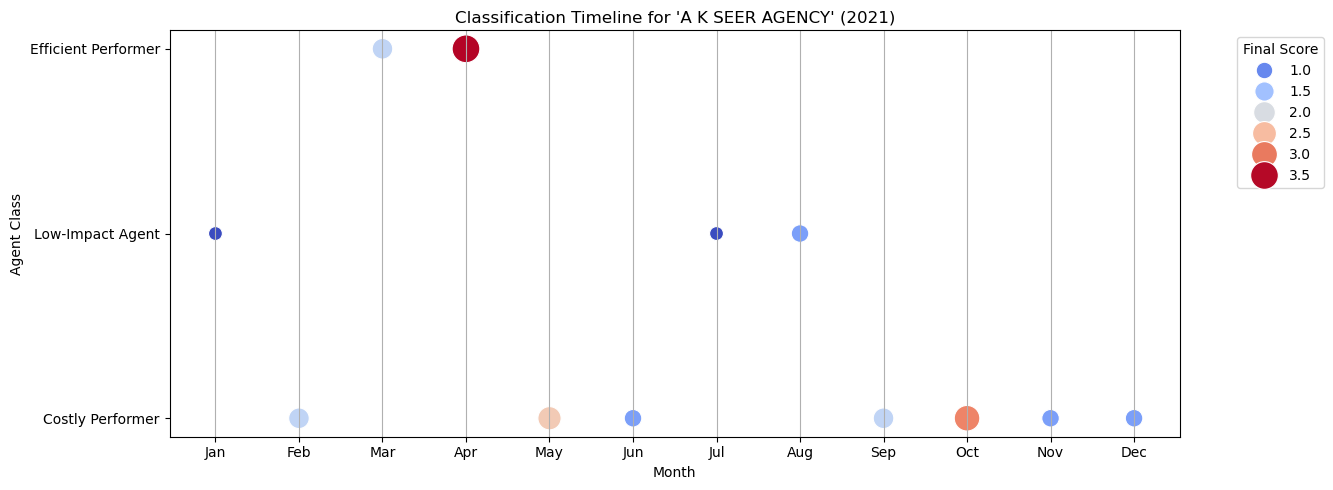

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Custom agent class order
class_order = [
    'Efficient Performer',
    'Low-Impact Agent',
    'Costly Performer',
    'High-Risk Underperformer'
]

# Filter data for the agent and time period
agent_df = processed_data[
    (processed_data['agent_name'] == 'A K SEER AGENCY') &
    (processed_data['ac_month_date'] >= '2022-01-01') &
    (processed_data['ac_month_date'] <= '2022-12-01') &
    (processed_data['date_type'] == 'MLY')
].copy()

# Set agent class as categorical with correct order
agent_df['agent_class'] = pd.Categorical(agent_df['agent_class'], categories=class_order, ordered=True)

# Extract month name for better x-axis labeling
agent_df['month'] = agent_df['ac_month_date'].dt.strftime('%b')  # Jan, Feb, etc.
agent_df['month_num'] = agent_df['ac_month_date'].dt.month
agent_df = agent_df.sort_values('month_num')

# Plot: agent_class vs. month
plt.figure(figsize=(12, 5))
sns.scatterplot(
    data=agent_df,
    x='month',
    y='agent_class',
    size='final_score',
    hue='final_score',
    palette='coolwarm',
    sizes=(100, 400),
    legend='brief'
)

plt.title("Classification Timeline for 'A K SEER AGENCY' (2021)")
plt.xlabel("Month")
plt.ylabel("Agent Class")
plt.grid(True, axis='x')
plt.tight_layout()
plt.legend(title='Final Score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


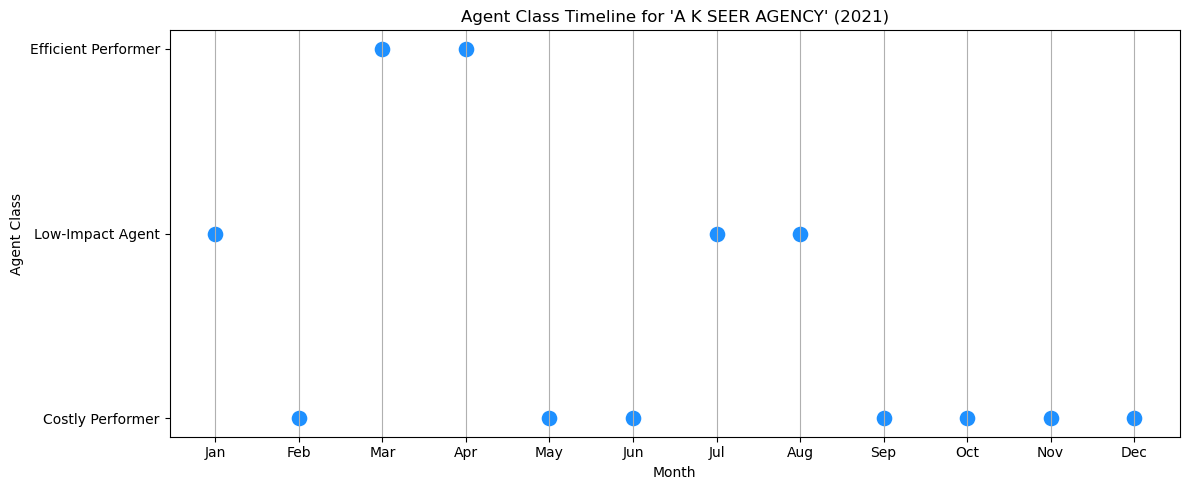

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Custom agent class order
class_order = [
    'Efficient Performer',
    'Low-Impact Agent',
    'Costly Performer',
    'High-Risk Underperformer'
]

# Filter data
agent_df = processed_data[
    (processed_data['agent_name'] == 'A K SEER AGENCY') &
    (processed_data['ac_month_date'] >= '2022-01-01') &
    (processed_data['ac_month_date'] <= '2022-12-01') &
    (processed_data['date_type'] == 'MLY')
].copy()

# Ensure correct agent class order
agent_df['agent_class'] = pd.Categorical(agent_df['agent_class'], categories=class_order, ordered=True)
agent_df['month'] = agent_df['ac_month_date'].dt.strftime('%b')
agent_df['month_num'] = agent_df['ac_month_date'].dt.month
agent_df = agent_df.sort_values('month_num')

# Plot without final_score
plt.figure(figsize=(12, 5))
sns.scatterplot(
    data=agent_df,
    x='month',
    y='agent_class',
    color='dodgerblue',
    s=150,
    marker='o'
)

plt.title("Agent Class Timeline for 'A K SEER AGENCY' (2021)")
plt.xlabel("Month")
plt.ylabel("Agent Class")
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


In [15]:
processed_data[processed_data.agent_name == 'TENGKU RAZALEIGH BIN TENGKU MOHD HAMZAH']

,ac_month_date,agent_name,reporting_line,lob,nep,nic,noc,nop_t,final_score,nic/nep ratio,score_level,ratio_level,agent_class,date_type,account_yr
9896,2025-03-01,TENGKU RAZALEIGH BIN TENGKU MOHD HAMZAH,DBCC,MOT,315.669341,0.0,0.0,4.0,0.0,0.0,Low,Low,Low-Impact Agent,MLY,NaN
19606,NaT,TENGKU RAZALEIGH BIN TENGKU MOHD HAMZAH,DBCC,"FIR, MED, MOT",20319.871394,0.0,0.0,12.0,0.0,0.0,Low,Low,Low-Impact Agent,YLY,2022.0
19607,NaT,TENGKU RAZALEIGH BIN TENGKU MOHD HAMZAH,DBCC,"FIR, MED, MOT",12588.127144,0.0,0.0,12.0,0.0,0.0,Low,Low,Low-Impact Agent,YLY,2023.0
19608,NaT,TENGKU RAZALEIGH BIN TENGKU MOHD HAMZAH,DBCC,"FIR, MED, MOT",9290.297612,0.0,0.0,11.0,0.0,0.0,Low,Low,Low-Impact Agent,YLY,2024.0


In [16]:
# Show rows where either score_level or ratio_level is NaN
nan_rows = processed_data[processed_data[['score_level', 'ratio_level']].isna().any(axis=1)]

# If you specifically want to see the unique reporting lines with these NaNs:
reporting_lines_with_nans = nan_rows['reporting_line'].unique()

print(reporting_lines_with_nans)

[]


In [17]:
nan_rows_both = processed_data[processed_data[['score_level', 'ratio_level']].isna().all(axis=1)]
nan_rows_both

,ac_month_date,agent_name,reporting_line,lob,nep,nic,noc,nop_t,final_score,nic/nep ratio,score_level,ratio_level,agent_class,date_type,account_yr


In [29]:
# Fill NaT values in 'ac_month_date' based on 'date_type' and 'account_yr', ensuring account_yr is not NaN
processed_data['ac_month_date'] = pd.to_datetime(processed_data['ac_month_date'], errors='coerce')
# Process rows to fill NaT with account_yr values for YLY
for idx, row in processed_data.iterrows():
    if pd.isna(row['ac_month_date']) and row['date_type'] == 'YLY' and pd.notna(row['account_yr']):
        processed_data.at[idx, 'ac_month_date'] = pd.to_datetime(f"{int(row['account_yr'])}-01-01")

# Drop 'account_yr' column
# df = df.drop(columns=['account_yr'])
processed_data[processed_data.agent_name == 'A K SEER AGENCY']
processed_data.shape

(19614, 15)

In [21]:
processed_data[processed_data.agent_name == 'A K SEER AGENCY']
processed_data.dtypes

ac_month_date     datetime64[ns]
agent_name                object
reporting_line            object
lob                       object
nep                      float64
nic                      float64
noc                      float64
nop_t                    float64
final_score              float64
nic/nep ratio            float64
score_level               object
ratio_level               object
agent_class               object
date_type                 object
account_yr               float64
dtype: object

In [15]:
# def process_data(start_date,flag, df):
#     start_date = pd.to_datetime(start_date)
#     # Thresholds for each line of business (lob)
#     lob_thresholds = {
#         'PAC': 0.50,
#         'FIR': 0.50,
#         'LIA': 0.50,
#         'ENG': 0.60,
#         'WRK': 0.20,
#         'ACC': 0.45,
#         'MAR': 0.35,
#         'MED': 0.65,
#         'BON': 0.10,
#         'HUL': 0.65,
#         'MOT': 0.75
#     }
    
#     # Weights
#     WEIGHT_PROFITABILITY = 0.40
#     WEIGHT_CLAIMS = 0.30
#     WEIGHT_GWP_GROWTH = 0.30
#     def normalize_columns(col):
#         min_val, max_val = col.min(), col.max()
#         return (col - min_val) / (max_val - min_val) if min_val != max_val else pd.Series([np.nan]*len(col), index=col.index)

#     def calculate_profitability(data):
#         def assign_lob_score(row):
#             threshold = lob_thresholds.get(row['lob'], 0.75)
#             return threshold - row['loss_ratio']
#         data['lob_score'] = data.apply(assign_lob_score, axis=1)
#         data['Nlob_score'] = normalize_columns(data['lob_score'])
#         return data

#     def classify_agents(df, score_col='final_score', ratio_col='nic/nep ratio', score_pct=0.75, ratio_pct=0.70):
#         df[ratio_col] = df[ratio_col].clip(lower=0)
#         score_thresh = df[score_col].quantile(score_pct)
#         ratio_thresh = df[ratio_col].quantile(ratio_pct)
#         df['score_level'] = np.where(df[score_col] > score_thresh, 'High', 'Low')
#         df['ratio_level'] = np.where(df[ratio_col] > ratio_thresh, 'High', 'Low')

#         def assign_class(row):
#             if row['score_level'] == 'High' and row['ratio_level'] == 'Low':
#                 return 'Efficient Performer'
#             elif row['score_level'] == 'High' and row['ratio_level'] == 'High':
#                 return 'Costly Performer'
#             elif row['score_level'] == 'Low' and row['ratio_level'] == 'High':
#                 return 'High-Risk Underperformer'
#             else:
#                 return 'Low-Impact Agent'

#         df['agent_class'] = df.apply(assign_class, axis=1)
#         return df

#     def process_reporting_line_df_monthly(df):
#         df = df.sort_values(by=['agent_name', 'ac_month_date'], ascending=[True, True]).reset_index(drop=True)
#         df['nic/nep ratio'] = df['nic']/df['nep']
#         return df

#     def process_reporting_line_df_yearly(df):
#         df = df.sort_values(by=['agent_name', 'account_yr'], ascending=[True, True]).reset_index(drop=True)
#         df['nic/nep ratio'] = df['nic']/df['nep']
#         return df

#     def apply_classification_to_all_dfs_monthly(reporting_line_dfs_M):
#         for name, df_subset in reporting_line_dfs_M.items():
#             reporting_line_dfs_M[name] = df_subset.groupby('ac_month_date').apply(classify_agents).reset_index(drop=True)
#             reporting_line_dfs_M[name] = reporting_line_dfs_M[name].sort_values(by=['agent_name', 'ac_month_date']).reset_index(drop=True)
#             print(f"{name} DataFrame shape after classification: {reporting_line_dfs_M[name].shape}")
#         return reporting_line_dfs_M

#     def apply_classification_to_all_dfs_yearly(reporting_line_dfs_Y):
#         for name, df_subset in reporting_line_dfs_Y.items():
#             reporting_line_dfs_Y[name] = df_subset.groupby('account_yr').apply(classify_agents).reset_index(drop=True)
#             reporting_line_dfs_Y[name] = reporting_line_dfs_Y[name].sort_values(by=['agent_name', 'account_yr']).reset_index(drop=True)
#             print(f"{name} DataFrame shape after classification: {reporting_line_dfs_Y[name].shape}")
#         return reporting_line_dfs_Y

#     if flag == 'MLY':
#         M = df.groupby(['ac_month_date', 'agent_name', 'lob', 'reporting_line']).agg({
#             'nep': 'sum',
#             'nic': 'sum',
#             'noc': 'sum',
#             'nop_t': 'sum',
#             'account_yr': 'first'}).reset_index()

#         M['frequency'] = M.apply(lambda row: divide(row['noc'], row['nop_t']), axis=1)
#         M['severity'] = M.apply(lambda row: divide(row['nic'], row['noc']), axis=1)
#         M['loss_ratio'] = M.apply(lambda row: divide(row['nic'], row['nep']), axis=1)

#         M = calculate_profitability(M)
#         M['claims_score'] = M['frequency'] + M['severity']
#         M['Nclaims_score'] = normalize_columns(M['claims_score'])

#         M['prev_month'] = M.groupby(['agent_name', 'lob'])['ac_month_date'].shift(1)
#         M['prev_nep'] = M.groupby(['agent_name', 'lob'])['nep'].shift(1)
#         M['nep_growth'] = ((M['nep'] - M['prev_nep']) / M['prev_nep'].replace(0, np.nan)).fillna(0)
#         M['Nnep_growth'] = normalize_columns(M['nep_growth'])
#         M['final_score'] = (
#             WEIGHT_PROFITABILITY * M['Nlob_score'] +
#             WEIGHT_CLAIMS * M['Nclaims_score'] +
#             WEIGHT_GWP_GROWTH * M['Nnep_growth']
#         )
#         M1 = M.groupby(['ac_month_date', 'agent_name', 'reporting_line']).agg({
#             'lob': lambda x: ', '.join(sorted(set(x))),
#             'nep': 'sum',
#             'nic': 'sum',
#             'noc': 'sum',
#             'nop_t': 'sum',
#             'final_score': 'sum'
#         }).reset_index()
#         M1 = M1[M1.agent_name != 'THE PACIFIC INSURANCE BERHAD (KL)']

#         reporting_line_dfs_M = {
#             line: M1[M1['reporting_line'] == line].copy()
#             for line in M1['reporting_line'].unique()
#         }
#         for name, df_subset in reporting_line_dfs_M.items():
#             reporting_line_dfs_M[name] = process_reporting_line_df_monthly(df_subset)

#         reporting_line_dfs_M = apply_classification_to_all_dfs_monthly(reporting_line_dfs_M)

#         # Assign named variables
#         branches_df = reporting_line_dfs_M.get('Branches', pd.DataFrame())
#         pos_affinity_df = reporting_line_dfs_M.get('POS/Affinity', pd.DataFrame())
#         kl_agency_df = reporting_line_dfs_M.get('KL Agency', pd.DataFrame())
#         pamp_affinity_df = reporting_line_dfs_M.get('PAMB Affinity', pd.DataFrame())
#         alt_channel_df = reporting_line_dfs_M.get('Alternative Channel', pd.DataFrame())
#         reinsurance_df = reporting_line_dfs_M.get('Reinsurance', pd.DataFrame())
#         dbcc_df = reporting_line_dfs_M.get('DBCC', pd.DataFrame())

#         finaldfM = pd.concat(reporting_line_dfs_M.values(), ignore_index=True)
#         finaldfM['date_type'] = 'MLY'
#         return finaldfM

#     elif flag == 'YLY':
#         N = df.groupby(['account_yr', 'agent_name', 'lob', 'reporting_line']).agg({
#             'nep': 'sum',
#             'nic': 'sum',
#             'noc': 'sum',
#             'nop_t': 'sum'}).reset_index()

#         N['frequency'] = N.apply(lambda row: divide(row['noc'], row['nop_t']), axis=1)
#         N['severity'] = N.apply(lambda row: divide(row['nic'], row['noc']), axis=1)
#         N['loss_ratio'] = N.apply(lambda row: divide(row['nic'], row['nep']), axis=1)

#         N = calculate_profitability(N)
#         N['claims_score'] = N['frequency'] + N['severity']
#         N['Nclaims_score'] = normalize_columns(N['claims_score'])

#         N['prev_nep'] = N.groupby(['agent_name', 'lob'])['nep'].shift(1)
#         N['nep_growth'] = ((N['nep'] - N['prev_nep']) / N['prev_nep'].replace(0, np.nan)).fillna(0)
#         N['Nnep_growth'] = normalize_columns(N['nep_growth'])

#         N['final_score'] = (
#             WEIGHT_PROFITABILITY * N['Nlob_score'] +
#             WEIGHT_CLAIMS * N['Nclaims_score'] +
#             WEIGHT_GWP_GROWTH * N['Nnep_growth']
#         )
#         N1 = N.groupby(['account_yr', 'agent_name', 'reporting_line']).agg({
#             'lob': lambda x: ', '.join(sorted(set(x))),
#             'nep': 'sum',
#             'nic': 'sum',
#             'noc': 'sum',
#             'nop_t': 'sum',
#             'final_score': 'sum'
#         }).reset_index()
#         N1['nic/nep ratio'] = N1['nic'] / N1['nep']

#         reporting_line_dfs_Y = {
#             line: N1[N1['reporting_line'] == line].copy()
#             for line in N1['reporting_line'].unique()
#         }
#         for name, df_subset in reporting_line_dfs_Y.items():
#             reporting_line_dfs_Y[name] = process_reporting_line_df_yearly(df_subset)

#         reporting_line_dfs_Y = apply_classification_to_all_dfs_yearly(reporting_line_dfs_Y)

#         # Assign named variables
#         branches_df = reporting_line_dfs_Y.get('Branches', pd.DataFrame())
#         pos_affinity_df = reporting_line_dfs_Y.get('POS/Affinity', pd.DataFrame())
#         kl_agency_df = reporting_line_dfs_Y.get('KL Agency', pd.DataFrame())
#         pamp_affinity_df = reporting_line_dfs_Y.get('PAMB Affinity', pd.DataFrame())
#         alt_channel_df = reporting_line_dfs_Y.get('Alternative Channel', pd.DataFrame())
#         reinsurance_df = reporting_line_dfs_Y.get('Reinsurance', pd.DataFrame())
#         dbcc_df = reporting_line_dfs_Y.get('DBCC', pd.DataFrame())

#         finaldfY = pd.concat(reporting_line_dfs_Y.values(), ignore_index=True)
#         finaldfY['date_type'] = 'YLY'
#         return finaldfY

In [36]:
# processed_data = process_data(start_date,flag, df)

In [18]:
processed_data[processed_data.agent_name == 'A NAGENDRAN AGENCY']
# processed_data.shape

,ac_month_date,agent_name,reporting_line,lob,nep,nic,noc,nop_t,final_score,nic/nep ratio,score_level,ratio_level,agent_class,date_type,account_yr
8,2025-01-01,A NAGENDRAN AGENCY,Branches,"LIA, MOT, PAC",7899.332417,593.19,0.0,7.0,0.000000,0.075094,Low,Low,Low-Impact Agent,MLY,NaN
9,2025-02-01,A NAGENDRAN AGENCY,Branches,MOT,1828.990463,663.00,1.0,2.0,0.410330,0.362495,High,High,Costly Performer,MLY,NaN
10,2025-03-01,A NAGENDRAN AGENCY,Branches,MOT,1322.467308,0.00,0.0,2.0,0.000000,0.000000,Low,Low,Low-Impact Agent,MLY,NaN
11,2025-04-01,A NAGENDRAN AGENCY,Branches,MOT,6084.660137,4419.67,1.0,3.0,0.412567,0.726363,High,High,Costly Performer,MLY,NaN
12,2025-05-01,A NAGENDRAN AGENCY,Branches,MOT,6023.332967,1521.00,2.0,14.0,0.410462,0.252518,Low,High,High-Risk Underperformer,MLY,NaN
9910,NaT,A NAGENDRAN AGENCY,Branches,"LIA, MOT, PAC",47536.552908,54294.62,6.0,73.0,0.034786,1.142166,Low,High,High-Risk Underperformer,YLY,2022.0
9911,NaT,A NAGENDRAN AGENCY,Branches,"LIA, MOT, PAC",61810.473526,168131.86,6.0,66.0,0.040552,2.720119,High,High,Costly Performer,YLY,2023.0
9912,NaT,A NAGENDRAN AGENCY,Branches,"LIA, MOT, PAC",45782.550728,36460.46,2.0,53.0,0.037629,0.796383,High,Low,Efficient Performer,YLY,2024.0


In [39]:
# --- DATABASE CONNECTION AND UPLOAD ---
# Define the database connection parameters
host = "172.16.10.212"
dbname = "PIB_PRD"
user = "usr_app_pdi"
password = 'Usr@ppPd!#123'
port = "5432"  # Default is 5432

# Safely encode credentials
safe_user = quote_plus(user)
safe_password = quote_plus(password)

# Build connection string
connection_string = f'postgresql+psycopg2://{safe_user}:{safe_password}@{host}:{port}/{dbname}'
engine = create_engine(connection_string)
processed_data.to_sql('all_lob_ag_class', engine, schema='ads', if_exists='replace', index=False)
print("Dataframe uploaded successfully.")

Dataframe uploaded successfully.


In [40]:
if cursor:
    cursor.close()
if connection:
    connection.close()

In [14]:
processed_data.shape

(19634, 15)

In [28]:
processed_data.isnull().sum()

ac_month_date        0
agent_name           0
reporting_line       0
lob                  0
nep                  0
nic                  0
noc                  0
nop_t                0
final_score          0
nic/nep ratio        0
score_level          0
ratio_level          0
agent_class          0
date_type            0
account_yr        9902
dtype: int64